In [1]:
import pandas as pd
import numpy as np

In [2]:
#!wget http://iali.in/datasets/Social_Network_Ads.csv #Download on Local

In [3]:
ds=pd.read_csv("http://iali.in/datasets/Social_Network_Ads.csv")
ds.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
ds['Purchased'].unique() #check if Classification or Regression!

array([0, 1])

# Classification Problem
### "Purchased" column has ony 2 unique values, so it is basically Binary Classification problem

In [6]:
ds.isnull().any() #check for null values

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [7]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#transforming non numerical labels (Gender) to numeric labels
ds['Gender']=le.fit_transform(ds['Gender'])

In [73]:
ds.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
5,15728773,1,27,58000,0
6,15598044,0,27,84000,0
7,15694829,0,32,150000,1
8,15600575,1,25,33000,0
9,15727311,0,35,65000,0


In [12]:
ds['Gender'].unique()
# Only two unique values, so need of One Hot Encoding

array([1, 0])

In [13]:
#we are seperating x and y values using iloc[]
x=ds.iloc[:,1:4].values
y=ds.iloc[:,4].values

# iloc [ [Row_Start : Row_End] , [column-1, Colunm-2,column-n] ]

In [14]:
x.shape

(400, 3)

In [15]:
# Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape

(320, 3)

## StandardScaler 

 It transforms the data in such a manner that it has mean as 0 and standard deviation as 1. In short, it standardizes the data. Standardization is useful for data which has negative values. It arranges the data in a standard normal distribution.

## let's verify this with an example;

In [16]:
from sklearn.preprocessing import StandardScaler
import numpy as np

 #4 samples/observations and 2 variables/features
data = np.array([[0,0] , [1,0] , [0,1] , [1,1]])
scaler =StandardScaler()
scaled_data = scaler.fit_transform(data)

print(data)
print(scaled_data)

[[0 0]
 [1 0]
 [0 1]
 [1 1]]
[[-1. -1.]
 [ 1. -1.]
 [-1.  1.]
 [ 1.  1.]]


In [17]:
#Verify that the mean of each feature (column) is 0:
scaled_data.mean(axis=0)


array([0., 0.])

In [18]:
#Verify that the std of each feature (column) is 1:
scaled_data.std(axis=0)


array([1., 1.])

In [19]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [20]:
# Training the model using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [21]:
y_pred=dtc.predict(x_test)

In [22]:
# Getting the Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.875

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


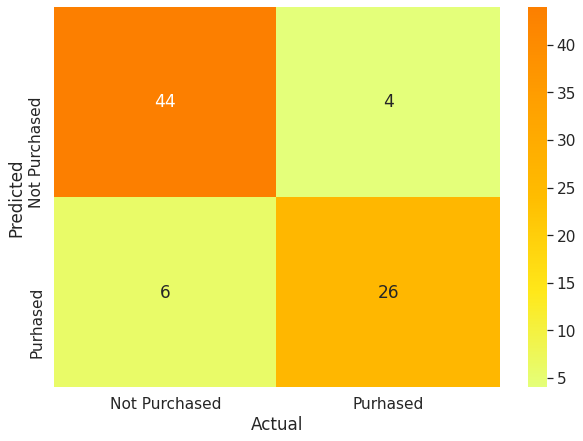

In [23]:
labels = ["Not Purchased", "Purhased"]
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred), columns=labels, index= labels)
df_cm.index.name ='Predicted'
df_cm.columns.name = 'Actual'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Wistia", annot=True,annot_kws={"size": 17})

## ROC Curve
Receiver Operating Characteristic curve. It is nothing but a graph displaying the performance of a classification model. It is a very popular method to measure the accuracy of a classification model.

**(Note: this implementation is restricted to the binary classification task.)

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

In [27]:
# Getting the roc
import sklearn.metrics as metrics   # to measure classification performance.
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)

Text(0.5, 0, 'fpr')

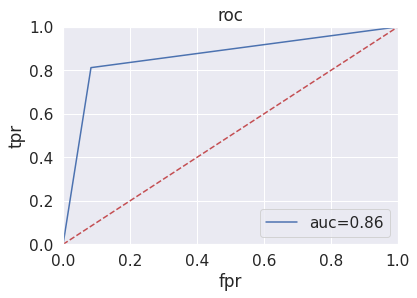

In [28]:
# Plotting the roc-auc curve
import matplotlib.pyplot as plt
plt.title("roc")
plt.plot(fpr,tpr,'b',label="auc=%0.2f"%roc_auc)
plt.legend(loc="lower right") #automatically creates a legend for labeled plot elements
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])  #Get or set the x limits of the current axes.
plt.ylim([0,1])  #Get or set the y limits of the current axes.
plt.ylabel("tpr")
plt.xlabel("fpr")

In [29]:
# Prediction for demo data 
dtc.predict(sc.fit_transform([[1,34,1900]]))

array([1])

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import fbeta_score, make_scorer # make_scorer takes a score function, and returns a callable that scores a classifier's output.
#F-beta score is for the positive class in binary classification

from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()

# optimised model

**Our optimized Random Forest model is:**

```
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
```




In [ ]:
# ftwo_scorer = make_scorer(fbeta_score, beta=2)
# parameters = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], 
#               "criterion": ["gini", "entropy"],
#               "max_features": ["auto", "sqrt", "log2"], 
#               "max_depth": [2, 3, 5, 10], 
#               "min_samples_split": [2, 3, 5, 10],
#               "min_samples_leaf": [1, 5, 8, 10]
#              }
# grid_cv = GridSearchCV(model, parameters, scoring = ftwo_scorer)
# grid_cv = grid_cv.fit(x_train, y_train)

# print("Our optimized Random Forest model is:")
# grid_cv.best_estimator_

In [55]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
#model = grid_cv.best_estimator_  (#uncomment this if you want to run the above cell & comment the below code)
model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [56]:
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
y_pred = model.predict(x_test)

In [58]:
# Conclude that 0 is Not Purchased and 1 is vice versa
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

labels = ["Not Purchased", "Purhased"]

y_pred=model.predict(x_test)
report = classification_report(y_test, y_pred, target_names=labels)
print(report)

               precision    recall  f1-score   support

Not Purchased       0.94      0.94      0.94        48
     Purhased       0.91      0.91      0.91        32

     accuracy                           0.93        80
    macro avg       0.92      0.92      0.92        80
 weighted avg       0.93      0.93      0.93        80



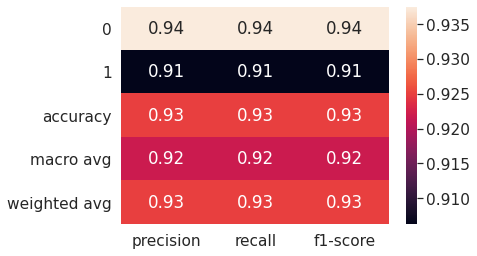

In [59]:
import seaborn as sns

classificationReport= classification_report(y_test, y_pred, target_names=classes, output_dict=True)

sns.heatmap(pd.DataFrame(classificationReport).iloc[:-1, :].T, annot=True)


Note:

`'macro':`

Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

`'weighted'`:
'weighted':
Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

`'Recall'`:
Note: A model that produces no false negatives has a recall of 1.0.


Improving precision typically reduces recall and vice versa.

## Let's plot the Confusion matrix

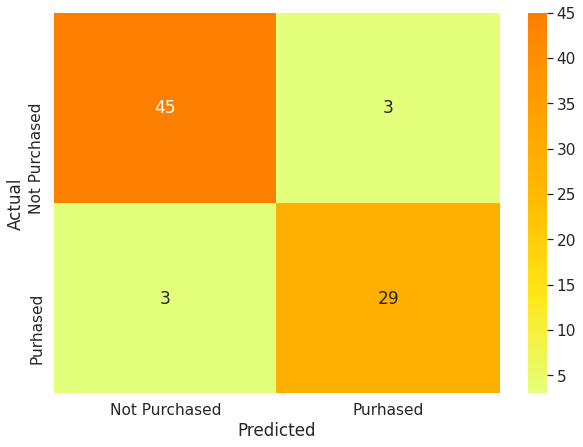

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt


df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred), columns=labels, index= labels)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Wistia", annot=True,annot_kws={"size": 17})

In [61]:
# Getting the roc
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)

Text(0.5, 0, 'fpr')

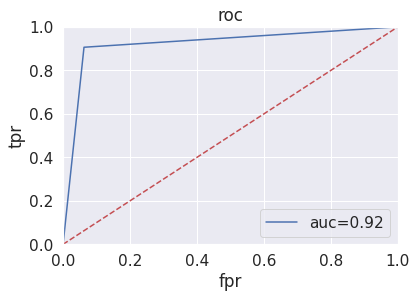

In [62]:
# Plotting the roc-auc curve
import matplotlib.pyplot as plt
plt.title("roc")
plt.plot(fpr,tpr,'b',label="auc=%0.2f"%roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("tpr")
plt.xlabel("fpr")

## Before we deploy;

In [67]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
tree = model.estimators_[3]
features= ['Gender',	'Age',	'EstimatedSalary']

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = features, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')

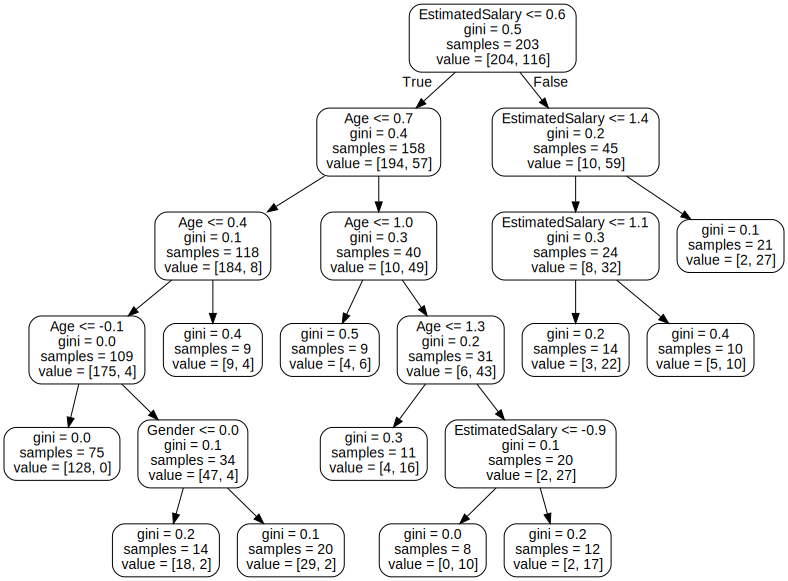

In [68]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# Saving Model

In [69]:
# Exporting model
import pickle
pickle.dump(dtc,open('model.pkl','wb'))

In [70]:
# Import & Predict
model=pickle.load(open('model.pkl','rb'))
model.predict(sc.fit_transform([[1,34,1900]]))

array([1])

**Where 0 is Not Purchased** 

**And 1 is Purchased**

## Let's Deploy our model!

We technically need a server to deploy our application but what we are using is also a server! YES a free VM provided by Google; 

So, What we can do is expose it to a public URL using ngrok and make API for our model using FLASK.

In [71]:
!pip install flask-ngrok

In [72]:
from flask import Flask, jsonify, make_response, request
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app)

@app.route("/")
def putStatus():
    return "Status: Running and Active..."

@app.route('/predict',methods=['POST'])
def getPredictions():
  data = request.get_json(force=True)
  gender = str(data['Gender'])
  age = str(data['Age'])
  sal = str(data['Salary'])
  test = np.array([[gender,age,sal]])
  model=pickle.load(open('model.pkl','rb'))
  prediction = model.predict(test)
  output = prediction[0]
  if (output == 0):
    return "He/She's not gonna purchase it!"
  else :
    return "He/She's gonna purchase it!"
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://7adbf321f618.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [26/Sep/2020 13:03:23] "POST /predict HTTP/1.1" 200 -


## Open New Colab Window -> file -> New Notebook

In [ ]:
#paste this code there

import requests, json

url = '[replace this with URL above]/predict'
req = requests.post(url, json={'Age':30, 'Salary':150000})

print(req.status_code)
print(req.text)

@Author [Ali Mustufa](https://www.iali.dev) 